In [1]:
import copy
import numpy as np

from random import choice
import matplotlib.pyplot as plt

from time import time
from tqdm import tqdm

import funcs as f

---

In [2]:
shape = (64,64)
betta = 10
img = f.import_img("input.png", bw=True, newshape=shape)
Vsize = img.size+2
s, t = 0, img.size+1

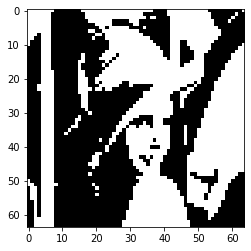

In [3]:
f.res_check(img)

In [4]:
g = f.init_g(img, scale=betta)
N = f.init_N(g)
#plt.imshow(g, cmap='gray')

---

In [5]:
# Residual graph
G_f = np.copy(g)

# Active nodes
A = [s, t]

# Orphans
O = []

# S and T trees
Tree = np.full(Vsize, -1)
Tree[0]  = 0  # s in S
Tree[-1] = 1 # t in T

# Parents
Parent = np.full(Vsize, -1) 

In [6]:
def iterarion(Tree, Parent, A, O, G_f, N):
    
    path, Tree, Parent, A = f.Growth_stage(Tree, Parent, A, G_f, N)
    if path == None:
        end = True
        return end, Tree, Parent, A, O, G_f, N
    
    Parent, O, G_f = f.Augmentation_stage(path, Tree, Parent, O, G_f)
    
    Tree, Parent, O, A = f.Adoption_stage(Tree, Parent, O, A, N, G_f)
    
    end = False
    return end, Tree, Parent, A, O, G_f, N

In [7]:
start = time()

end = False
while end != True:
    
    try:
        end, Tree, Parent, A, O, G_f, N = iterarion(Tree, Parent, A, O, G_f, N)
    except:
        print("End")
        break
        
print(f"Running time: {time() - start}")

End
Running time: 25.51863980293274


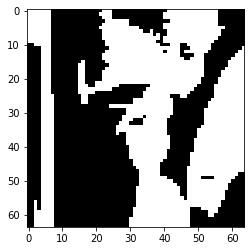

In [8]:
f.show_tree(Tree, shape)

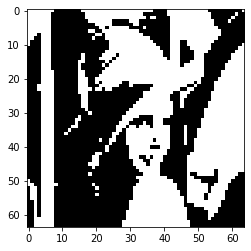

In [9]:
f.res_check(img)